In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


In [46]:
bestand = "movie-1-cleaned.csv"
df = pd.read_csv(bestand, encoding='utf-8')
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_rows', None)      
pd.set_option('display.width', 2000)         
pd.set_option('display.max_colwidth', None)  
df.head()


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [48]:
# Unieke landen
landen = df['country'].dropna().unique()
print("Aantal landen:", len(landen))
print("Landen:", landen)


Aantal landen: 47
Landen: ['USA' 'UK' 'New Zealand' 'Canada' 'Australia' 'Germany' 'China'
 'New Line' 'France' 'Japan' 'Spain' 'Hong Kong' 'Czech Republic' 'Peru'
 'South Korea' 'India' 'Aruba' 'Denmark' 'Belgium' 'Ireland'
 'South Africa' 'Italy' 'Romania' 'Chile' 'Netherlands' 'Hungary' 'Russia'
 'Mexico' 'Greece' 'Taiwan' 'Official site' 'Thailand' 'Iran'
 'West Germany' 'Georgia' 'Iceland' 'Brazil' 'Finland' 'Norway'
 'Argentina' 'Colombia' 'Poland' 'Israel' 'Indonesia' 'Afghanistan'
 'Sweden' 'Philippines']


In [49]:
# Aantal films per land tellen
films_per_land = df['country'].value_counts()

# Resultaat tonen
print("Aantal films per land:\n")
print(films_per_land)

Aantal films per land:

country
USA               3069
UK                 324
France             105
Germany             82
Canada              63
Australia           41
Spain               22
Japan               17
China               15
Hong Kong           13
India               13
Mexico              11
New Zealand         11
Italy               11
Denmark              9
South Korea          9
Ireland              7
Brazil               5
Norway               4
Iran                 4
Thailand             4
South Africa         3
Argentina            3
Czech Republic       3
Netherlands          3
Russia               3
Taiwan               2
Iceland              2
Belgium              2
Israel               2
Hungary              2
Romania              2
Poland               1
Indonesia            1
Colombia             1
Afghanistan          1
Sweden               1
Chile                1
Finland              1
Georgia              1
West Germany         1
Official site        1
Gr

In [50]:
# Unieke regisseurs
regisseurs = df['director_name'].dropna().unique()
print("Aantal regisseurs:", len(regisseurs))
print("Regisseurs:", regisseurs)


Aantal regisseurs: 1747
Regisseurs: ['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Kiyoshi Kurosawa'
 'Shane Carruth' 'Neill Dela Llana']


In [51]:
# Gemiddelde director_facebook_likes
avg_director_likes = df.groupby('director_name')['director_facebook_likes'].mean().sort_values(ascending=False)
print("Top 10 regisseurs met meeste Facebook-likes:")
print(avg_director_likes.head(10))


Top 10 regisseurs met meeste Facebook-likes:
director_name
Joseph Gordon-Levitt    23000.0
Christopher Nolan       22000.0
David Fincher           21000.0
Kevin Spacey            18000.0
Denzel Washington       18000.0
Martin Scorsese         17000.0
Quentin Tarantino       16000.0
Clint Eastwood          16000.0
Tom Hanks               15000.0
Steven Spielberg        14000.0
Name: director_facebook_likes, dtype: float64


In [52]:
# Hoofdacteurs likes
actors_likes_cols = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']

avg_actor_likes = df[actors_likes_cols].mean()
print("Gemiddeld aantal Facebook-likes per acteurpositie:")
print(avg_actor_likes)


Gemiddeld aantal Facebook-likes per acteurpositie:
actor_1_facebook_likes    7594.767586
actor_2_facebook_likes    1973.195053
actor_3_facebook_likes     753.534914
dtype: float64


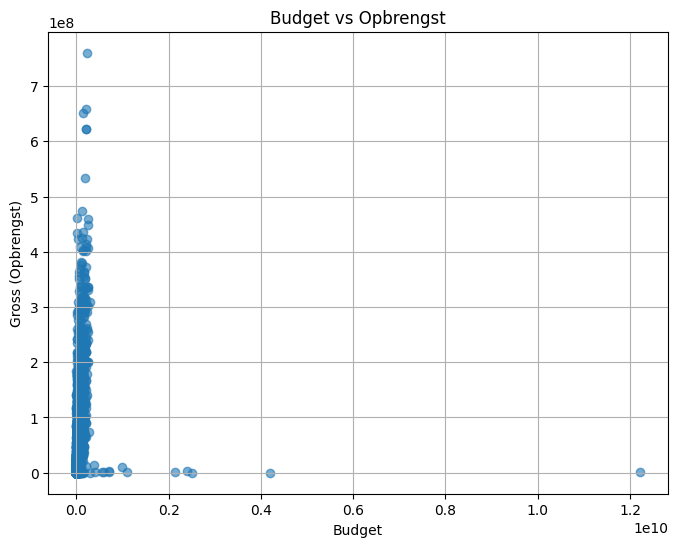

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(df['budget'], df['gross'], alpha=0.6)
plt.xlabel('Budget')
plt.ylabel('Gross (Opbrengst)')
plt.title('Budget vs Opbrengst')
plt.grid(True)
plt.show()


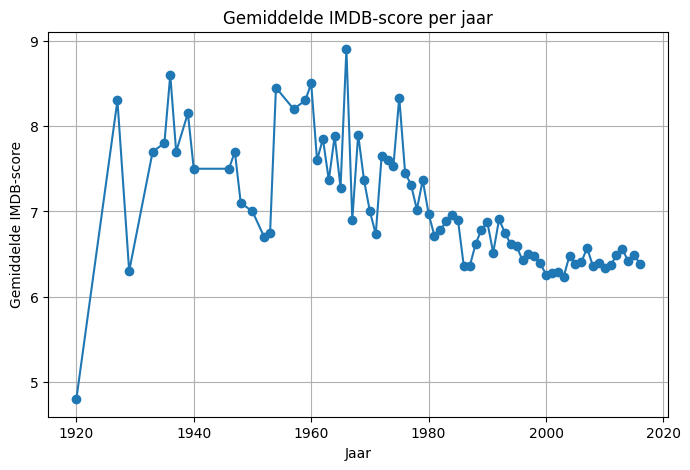

In [54]:
plt.figure(figsize=(8,5))
df.groupby('title_year')['imdb_score'].mean().plot(kind='line', marker='o')
plt.title('Gemiddelde IMDB-score per jaar')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde IMDB-score')
plt.grid(True)
plt.show()

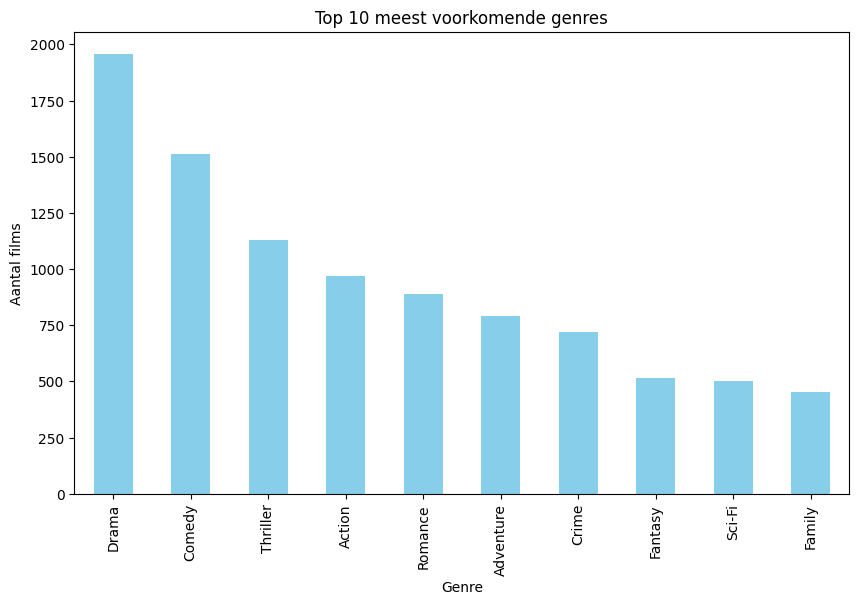

In [55]:
genre_counts = Counter('|'.join(df['genres'].dropna()).split('|'))
plt.figure(figsize=(10,6))
pd.Series(genre_counts).nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 meest voorkomende genres')
plt.xlabel('Genre')
plt.ylabel('Aantal films')
plt.show()

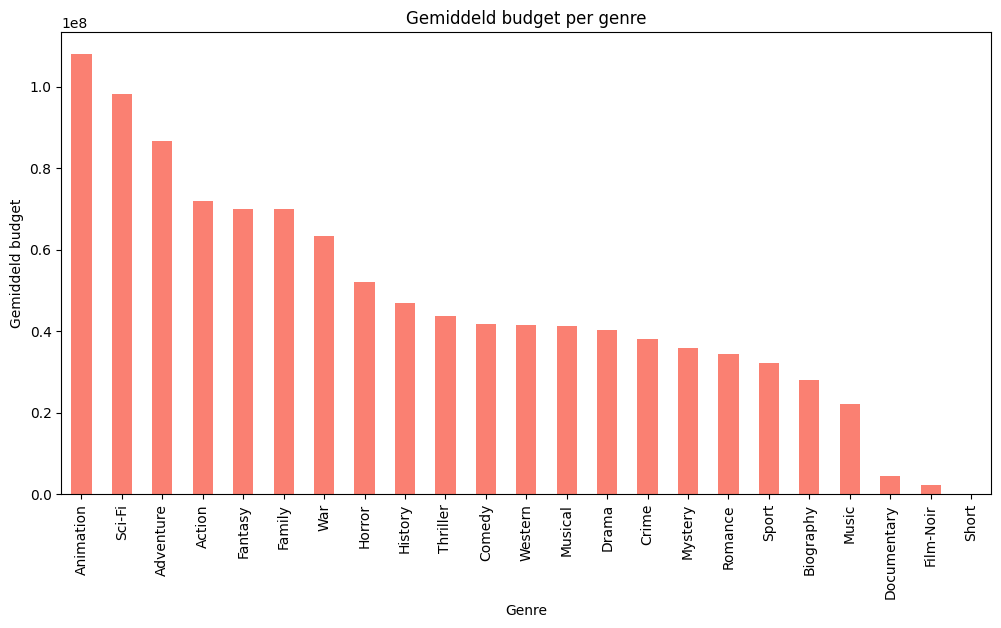

In [56]:
# Bereken gemiddelde budget per genre
genres_expanded = df.dropna(subset=['genres']).copy()
genres_expanded = genres_expanded.assign(genres=genres_expanded['genres'].str.split('|')).explode('genres')

plt.figure(figsize=(12,6))
genres_expanded.groupby('genres')['budget'].mean().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Gemiddeld budget per genre')
plt.xlabel('Genre')
plt.ylabel('Gemiddeld budget')
plt.show()


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11200\1079044159.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_budget_counts = df_money.groupby(['country', 'budget_bin']).size().unstack(fill_value=0)


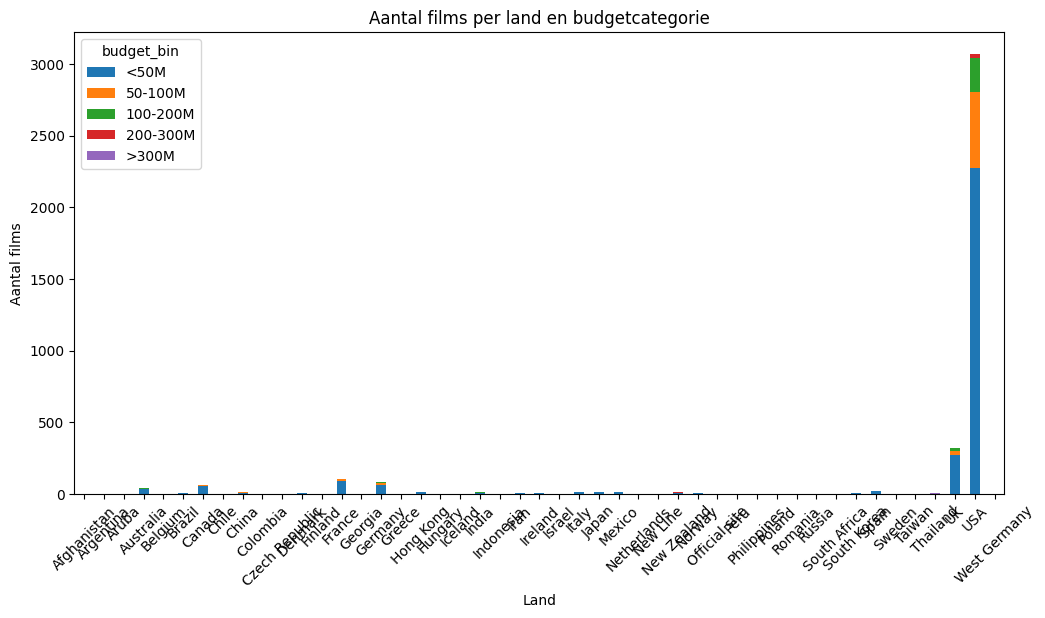

In [57]:
# Alleen rijen met geld- en landinformatie
df_money = df.dropna(subset=['budget', 'gross', 'country'])

# Maak budget bins
bins = [0, 50000000, 100000000, 200000000, 300000000, np.inf]
labels = ['<50M', '50-100M', '100-200M', '200-300M', '>300M']
df_money['budget_bin'] = pd.cut(df_money['budget'], bins=bins, labels=labels)

# Tel aantal films per land per budget bin
country_budget_counts = df_money.groupby(['country', 'budget_bin']).size().unstack(fill_value=0)

# Plot
country_budget_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Aantal films per land en budgetcategorie')
plt.xlabel('Land')
plt.ylabel('Aantal films')
plt.xticks(rotation=45)
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11200\2657318589.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gross = df_money.groupby(['country', 'budget_bin'])['gross'].mean().unstack()


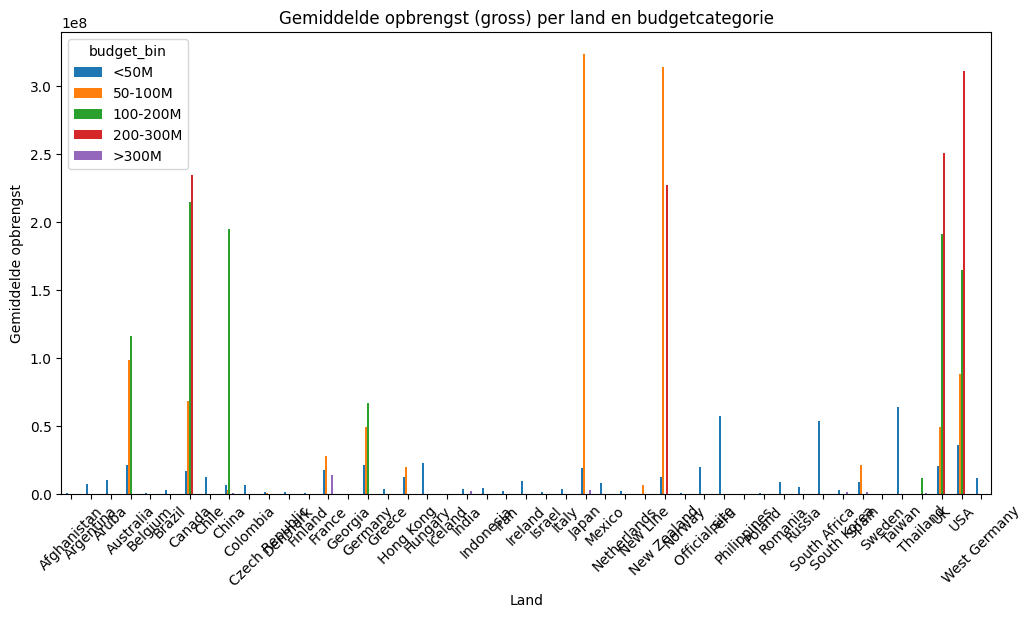

In [58]:
# Gemiddelde gross per land en budget bin
avg_gross = df_money.groupby(['country', 'budget_bin'])['gross'].mean().unstack()

# Plot
avg_gross.plot(kind='bar', figsize=(12,6))
plt.title('Gemiddelde opbrengst (gross) per land en budgetcategorie')
plt.xlabel('Land')
plt.ylabel('Gemiddelde opbrengst')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

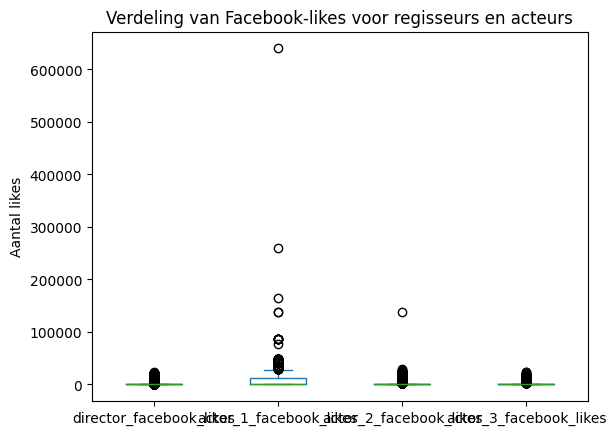

In [59]:
likes_cols = ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']

plt.figure(figsize=(10,6))
df[likes_cols].plot(kind='box')
plt.title('Verdeling van Facebook-likes voor regisseurs en acteurs')
plt.ylabel('Aantal likes')
plt.show()


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11200\2968135363.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (avg_budget_gross['budget'][i], avg_budget_gross['gross'][i]))


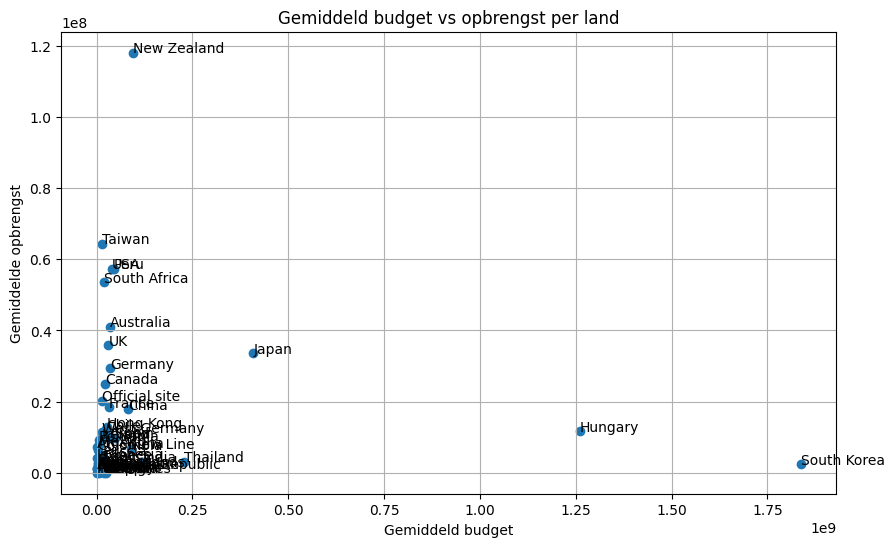

In [60]:
avg_budget_gross = df_money.groupby('country')[['budget','gross']].mean()

plt.figure(figsize=(10,6))
plt.scatter(avg_budget_gross['budget'], avg_budget_gross['gross'])
for i, txt in enumerate(avg_budget_gross.index):
    plt.annotate(txt, (avg_budget_gross['budget'][i], avg_budget_gross['gross'][i]))
plt.xlabel('Gemiddeld budget')
plt.ylabel('Gemiddelde opbrengst')
plt.title('Gemiddeld budget vs opbrengst per land')
plt.grid(True)
plt.show()
